Zomato Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r"C:\Users\vempa\OneDrive\Desktop\web scraping\zomato_cleaned_data_1.csv")
data.drop('Unnamed: 0',axis=1,inplace=True)
def change(row):
    if 'Oberoi Udaivilas - Chandpol' in row['Location']:
        row['Location']='Chandpol'
    return row
data=data.apply(change,axis=1)
df=data.copy()
df

,city_name,Restaurant_Name,Food_Type,Avg_cost(for one person),Rating,Location,Distance(km)
0,Agra,Qairo,"North Indian, Italian, Asian, Continental, Bir...",1200.0,4.5,Tajganj,2.50
1,Agra,The Salt Cafe Kitchen & Bar,"North Indian, Continental, Chinese, Italian, F...",1800.0,4.9,Tajganj,3.80
2,Agra,Unplugged Courtyard,"Mediterranean, North Indian, Continental, Chin...",1600.0,4.4,Tajganj,4.80
3,Agra,Downtown Cafe,"North Indian, Mughlai, Continental, Chinese, B...",1600.0,4.2,Rakabganj,1.40
4,Agra,Hotel Moti Palace - Pankhuri Restaurant,"North Indian, Chinese, Continental, South Indi...",1000.0,4.1,Rakabganj,1.40
...,...,...,...,...,...,...,...
10169,Vijayawada,Tandoori Hub,"Biryani, North Indian, Chinese, Seafood, Kebab",400.0,4.1,Auto Nagar,1.70
10170,Vijayawada,Puri Vurii,"Street Food, Maharashtrian, North Indian, Raja...",400.0,4.1,Labbipet,0.58
10171,Vijayawada,Aithey Biryani Restaurant,Biryani,300.0,4.3,Gandhi Nagar,2.20
10172,Vijayawada,Alpaharam's Kitchen Secrets,"Biryani, North Indian, Fast Food, South Indian...",500.0,3.8,Governorpet,2.30


**Uni-Variant Analysis**

In [4]:
df['city_name'].nunique()
# In the city column's there was 72 unique cities are there

72

In [5]:
# Around 72 Locations there was 1201 locations i taked
df['Location'].nunique()

1201

C:\Users\vempa\AppData\Local\Temp\ipykernel_22256\791171220.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df['Rating'],palette='Set1')


<Axes: xlabel='Rating', ylabel='Count'>

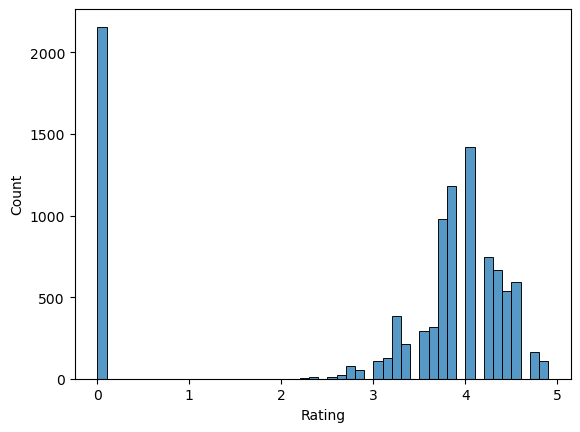

In [7]:
sns.histplot(df['Rating'],palette='Set1')
# df['Rating'].value_counts()
# For Rating out of 10000 hotels around 2000 hotels are new or have no rating so i give to these hotels as 0 rating

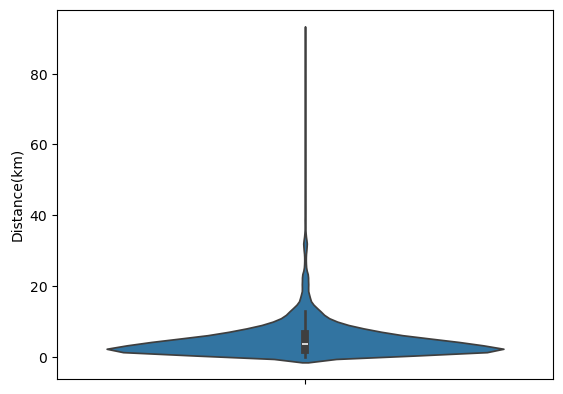

<Axes: xlabel='Distance(km)', ylabel='Count'>

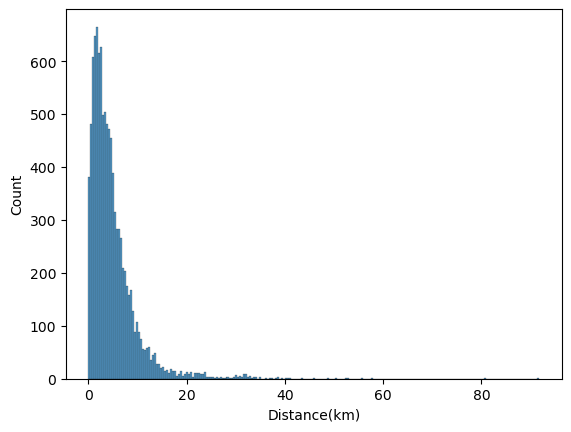

In [58]:
sns.violinplot(df['Distance(km)'])
plt.show()
sns.histplot(df['Distance(km)'])
# Majority no of hotels are located in 25km from the city 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Swarm plot for Distance(km)
plt.figure(figsize=(10, 6))
sns.swarmplot(x=df['Distance(km)'])
plt.xlabel('Distance (km)')
plt.title('Swarm Plot of Distance (km)')
plt.show()


**Bi-variance Analysis**


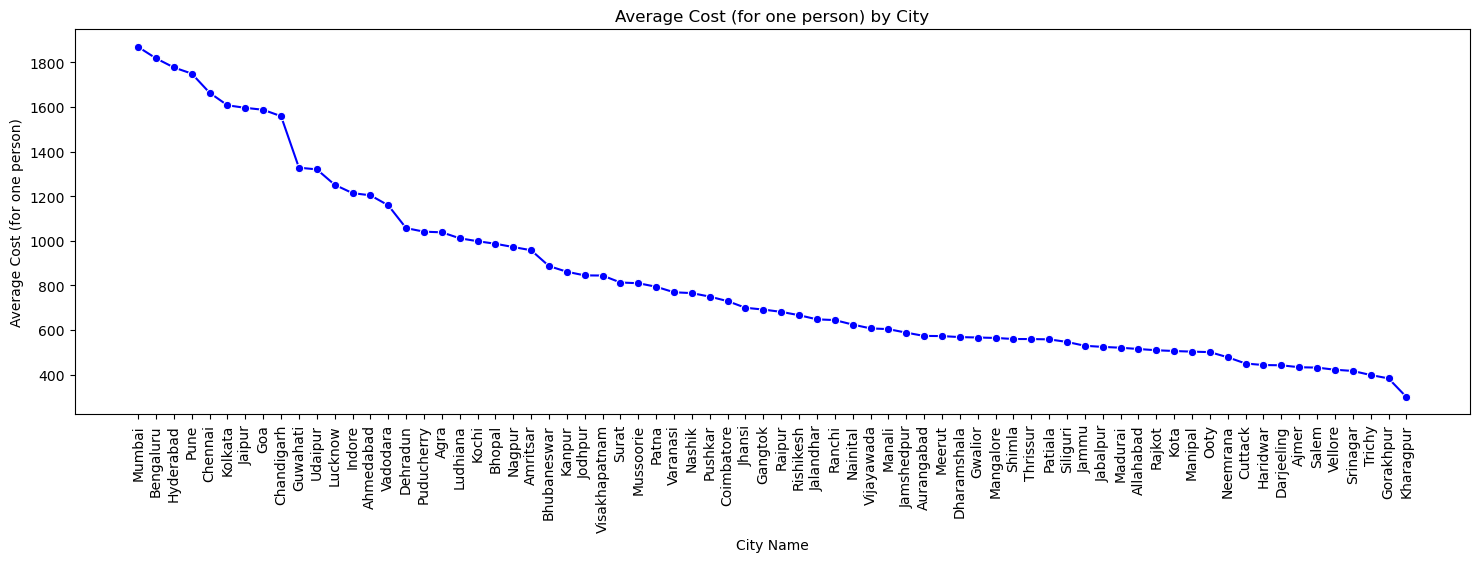

In [10]:
grouped_data = df.groupby('city_name')['Avg_cost(for one person)'].mean().sort_values(ascending=False)
plt.figure(figsize=(18, 5))  

sns.lineplot(x=grouped_data.index, y=grouped_data.values, marker='o', color='blue')
plt.title('Average Cost (for one person) by City')
plt.xlabel('City Name')
plt.ylabel('Average Cost (for one person)')
plt.xticks(rotation=90)
plt.show()

In [11]:
df.columns

Index(['city_name', 'Restaurant_Name', 'Food_Type', 'Avg_cost(for one person)',
       'Rating', 'Location', 'Distance(km)'],
      dtype='object')

In [56]:
# sns.scatterplot(x=df['Distance(km)'],y=df['Avg_cost(for one person)'])
# sns.scatterplot(x='Distance(km)', y='Avg_cost(for one person)',data=df,hue='Rating')

city_name
Shimla         240
Vijayawada     237
Trichy         237
Surat          236
Dharamshala    227
Ranchi         202
Amritsar       201
Kochi          200
Jalandhar      190
Patna          189
Name: Location, dtype: int64


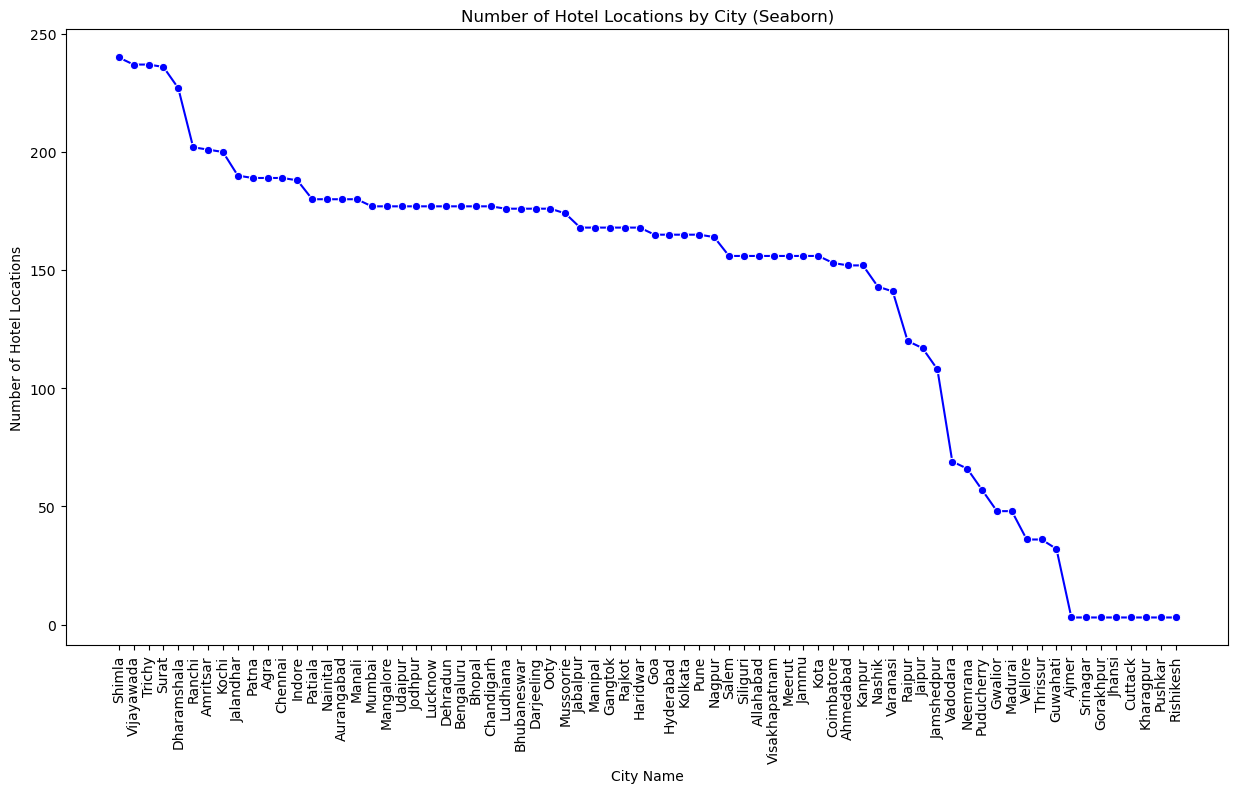

In [14]:
# print(df.groupby('city_name')['Location'].count().sort_values(ascending=False).describe())#.min(),df.groupby('city_name')['Location'].count().sort_values(ascending=False).max())
grouped_data=df.groupby('city_name')['Location'].count().sort_values(ascending=False)#.plot(kind='line')#
print(grouped_data.head(10))

plt.figure(figsize=(15, 8))
sns.lineplot(x=grouped_data.index, y=grouped_data.values, marker='o', color='blue')
plt.xlabel('City Name')
plt.ylabel('Number of Hotel Locations')
plt.title('Number of Hotel Locations by City (Seaborn)')
plt.xticks(rotation=90)
plt.show()

# The number of hotel locations in various cities across India ranges from 3 to 240. This indicates a significant variance in hotel availability across different cities.

<Axes: xlabel='Distance(km)', ylabel='Avg_cost(for one person)'>

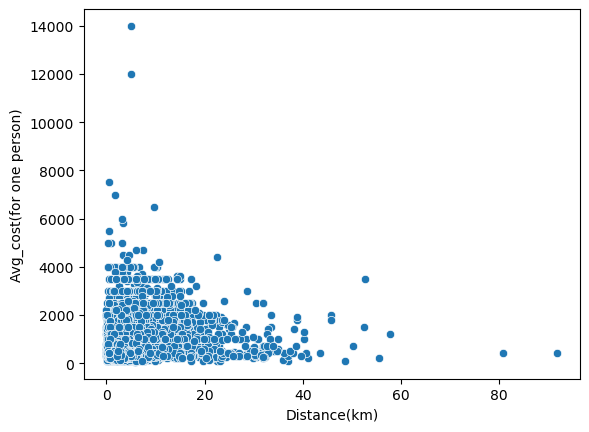

In [16]:
# print(data['Distance(km)'].corr(data['Avg_cost(for one person)']))
sns.scatterplot(x=data['Distance(km)'],y=data['Avg_cost(for one person)'])
# when the distance is increased the cost is doesn't increased Most But few hotels are charging the high amount even the hotel is located in urban area

**Multi_variance analysis**

<Axes: xlabel='Distance(km)', ylabel='Avg_cost(for one person)'>

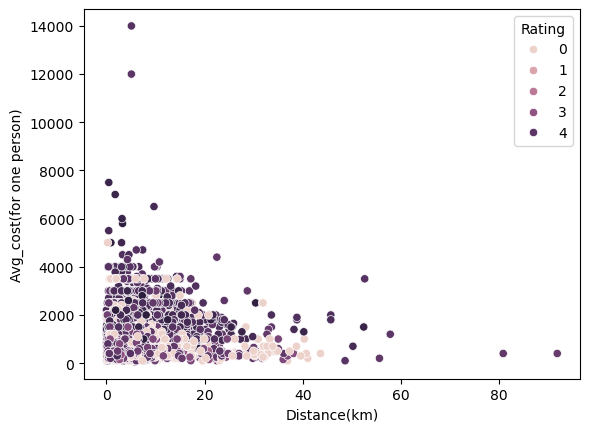

In [55]:
sns.scatterplot(x='Distance(km)', y='Avg_cost(for one person)',data=df,hue='Rating')
# Most hotels have an average cost per person that is low within the 0 to 40 km range. This suggests that proximity to central areas is associated with more affordable options.
# All hotels located at the outskirts of the city (beyond 40 km) have a rating of 4. This indicates that farther locations might provide higher-rated experiences.
# Hotels located near the city center (within the 0 to 40 km range) exhibit a wide range of ratings, from low to high. This implies that there is a diverse quality of services available in central areas.

In [34]:
# Group by Location and include city name
location_summary = df.groupby(["city_name", "Location"]).agg({
    "Rating": "mean",  # Average rating
    "Distance(km)": "median",  # Median distance
    "Avg_cost(for one person)": "mean",  # Average cost
}).reset_index()

# Normalize the data for ranking
location_summary["Rating_Score"] = location_summary["Rating"] / location_summary["Rating"].max()
location_summary["Distance_Score"] = 1 - (location_summary["Distance(km)"] / location_summary["Distance(km)"].max())  # Inverted
location_summary["Cost_Score"] = (location_summary["Avg_cost(for one person)"] / location_summary["Avg_cost(for one person)"].max())  # Lower is better

# Combine scores with weights
location_summary["Final_Score"] = (
    0.3 * location_summary["Rating_Score"] +
    0.3 * location_summary["Distance_Score"] +
    0.5 * location_summary["Cost_Score"]
)

# Sort by final score to get the best locations
location_summary["City_Location"] = location_summary["city_name"] + " - " + location_summary["Location"]
best_locations = location_summary.sort_values(by="Final_Score", ascending=False).head(10)
best_locations#.head(20)

,city_name,Location,Rating,Distance(km),Avg_cost(for one person),Rating_Score,Distance_Score,Cost_Score,Final_Score,City_Location
1144,Udaipur,Chandpol,4.90,0.92,5000.000000,1.000000,0.984083,0.993377,1.091914,Udaipur - Chandpol
499,Jodhpur,Cantt Area,4.00,5.30,5033.333333,0.816327,0.908304,1.000000,1.017389,Jodhpur - Cantt Area
175,Chennai,MRC Nagar,4.30,7.40,4700.000000,0.877551,0.871972,0.933775,0.991744,Chennai - MRC Nagar
411,Jaipur,Agra Road,4.10,4.80,4000.000000,0.836735,0.916955,0.794702,0.923458,Jaipur - Agra Road
166,Chennai,Guindy,4.36,9.70,4000.000000,0.889796,0.832180,0.794702,0.913944,Chennai - Guindy
126,Chandigarh,Chandigarh,4.40,1.50,3500.000000,0.897959,0.974048,0.695364,0.909284,Chandigarh - Chandigarh
84,Amritsar,Taj Swarna,4.40,2.80,3500.000000,0.897959,0.951557,0.695364,0.902537,Amritsar - Taj Swarna
1166,Udaipur,The LaLiT Laxmi Vilas Palace,4.10,1.50,3500.000000,0.836735,0.974048,0.695364,0.890917,Udaipur - The LaLiT Laxmi Vilas Palace
651,Lucknow,Husain Ganj,4.10,3.20,3500.000000,0.836735,0.944637,0.695364,0.882094,Lucknow - Husain Ganj
953,Pune,Nagar Road,4.10,7.30,3700.000000,0.836735,0.873702,0.735099,0.880681,Pune - Nagar Road


C:\Users\vempa\AppData\Local\Temp\ipykernel_22256\628020560.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=best_locations['City_Location'], x=best_locations['Final_Score'], palette='viridis')


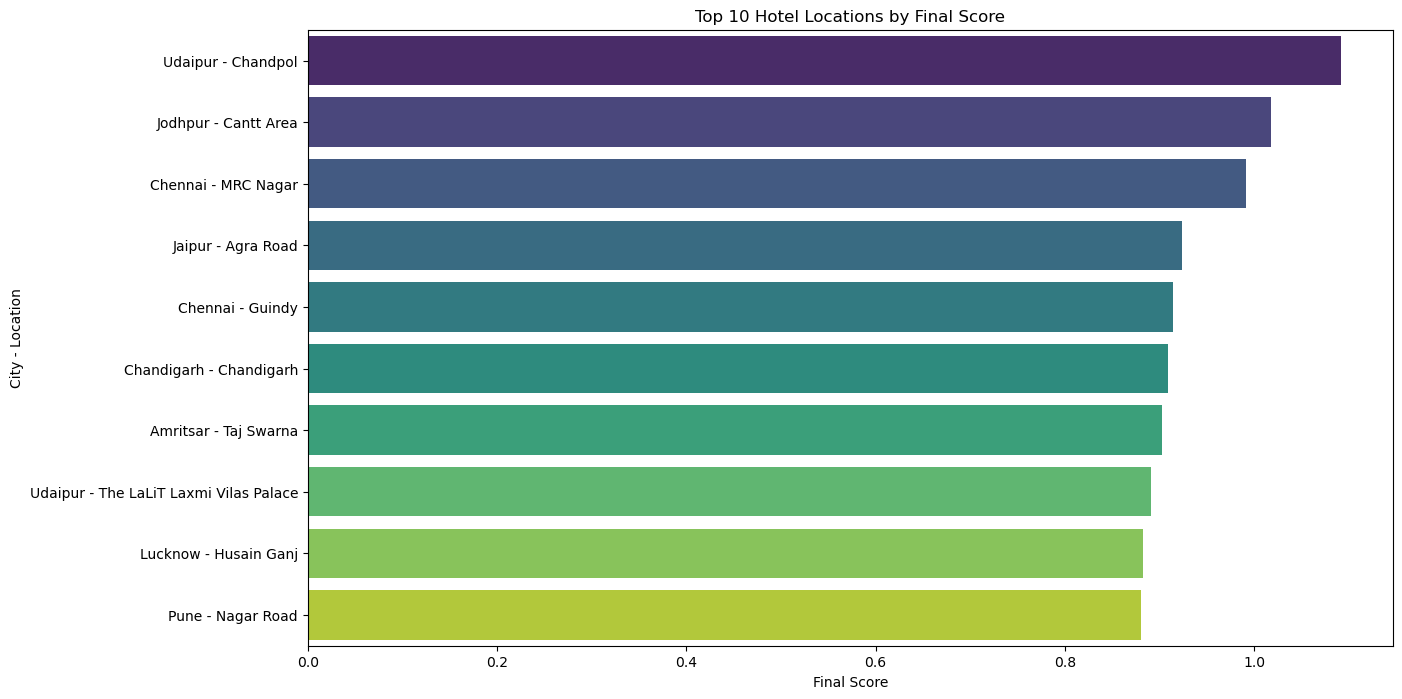

In [22]:
plt.figure(figsize=(14, 8))
sns.barplot(y=best_locations['City_Location'], x=best_locations['Final_Score'], palette='viridis')
plt.xlabel('Final Score')
plt.ylabel('City - Location')
plt.title('Top 10 Hotel Locations by Final Score')
plt.show()

In [4]:
data[data['city_name']=='Udaipur']['Avg_cost(for one person)'].mean()

1320.6214689265537

In [24]:
df['Food_Type']=df['Food_Type'].str.split(',')
food_df=df.explode('Food_Type')
food_df['Food_Type']=food_df['Food_Type'].str.strip()

In [25]:
food_df

,city_name,Restaurant_Name,Food_Type,Avg_cost(for one person),Rating,Location,Distance(km)
0,Agra,Qairo,North Indian,1200.0,4.5,Tajganj,2.50
0,Agra,Qairo,Italian,1200.0,4.5,Tajganj,2.50
0,Agra,Qairo,Asian,1200.0,4.5,Tajganj,2.50
0,Agra,Qairo,Continental,1200.0,4.5,Tajganj,2.50
0,Agra,Qairo,Biryani,1200.0,4.5,Tajganj,2.50
...,...,...,...,...,...,...,...
10173,Vijayawada,Sandwich & Shakes,Sandwich,400.0,4.0,Labbipet,0.61
10173,Vijayawada,Sandwich & Shakes,Fast Food,400.0,4.0,Labbipet,0.61
10173,Vijayawada,Sandwich & Shakes,Beverages,400.0,4.0,Labbipet,0.61
10173,Vijayawada,Sandwich & Shakes,Desserts,400.0,4.0,Labbipet,0.61


In [26]:
city_food=food_df[['city_name','Food_Type']]

Udaipur


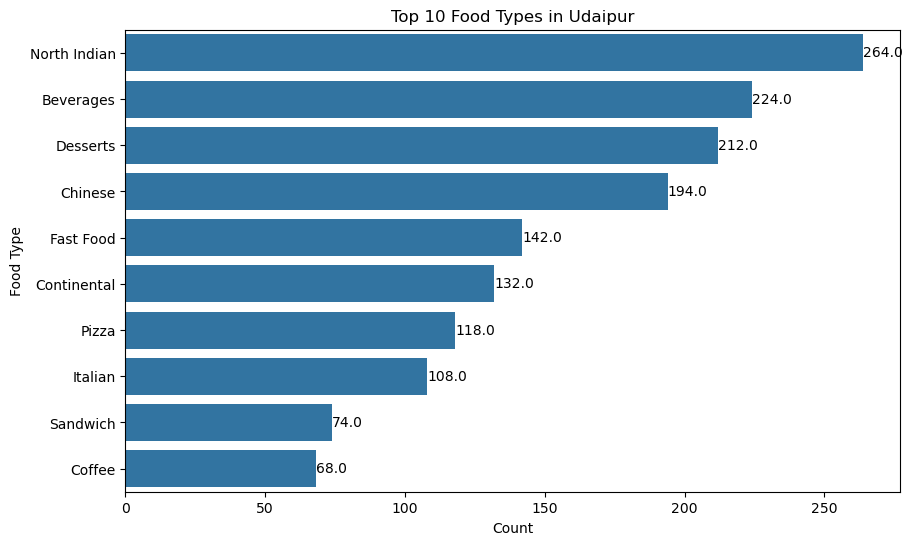

Jodhpur


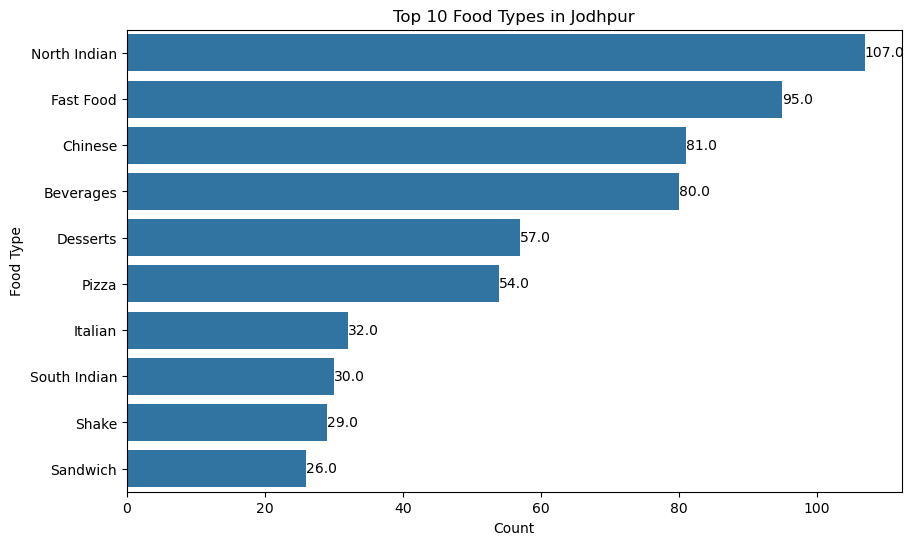

Chennai


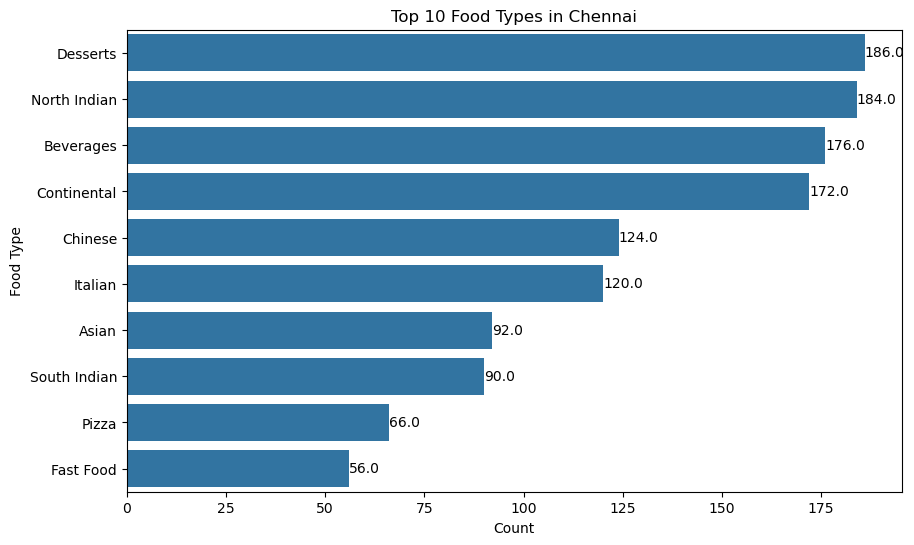

Jaipur


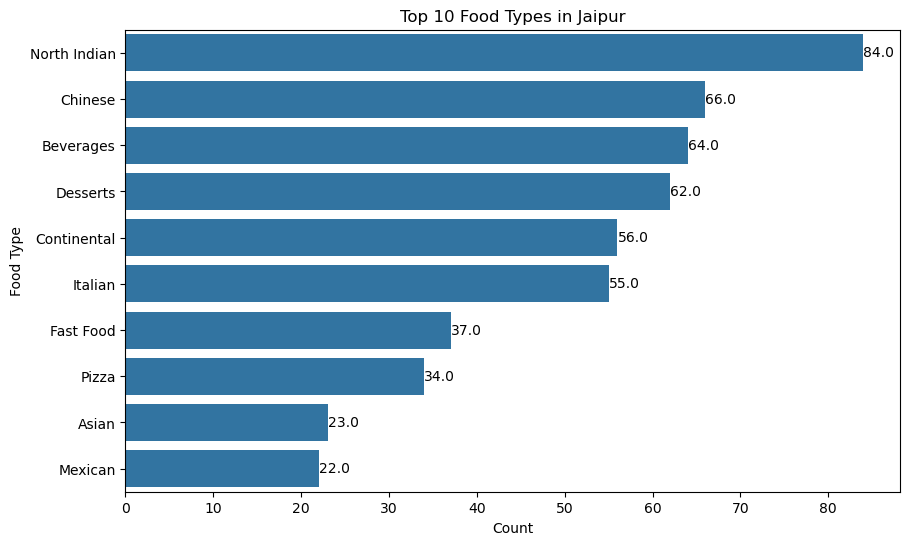

In [46]:
a=best_locations[['city_name']].head(10).merge(city_food,on='city_name',how='left')

for i in best_locations['city_name'].head().unique():
    print(i)
    f = a[a['city_name'] == i]['Food_Type'].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    barplot = sns.barplot(x=f.values, y=f.index)
    plt.xlabel('Count')
    plt.ylabel('Food Type')
    plt.title(f'Top 10 Food Types in {i}')
    
    for bar in barplot.patches:
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2.0, f'{bar.get_width()}', ha='left', va='center')
    
    plt.show()

Udaipur
1320.6214689265537
Jodhpur
845.1977401129943
Chennai
1664.021164021164
Jaipur
1596.5811965811965
Chandigarh
1559.0285714285715
Amritsar
957.9601990049752
Lucknow
1251.638418079096
Pune
1750.0


C:\Users\vempa\AppData\Local\Temp\ipykernel_22256\1364363353.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x='City Name', y='Average Cost', data=avg_cost_df, palette='viridis')


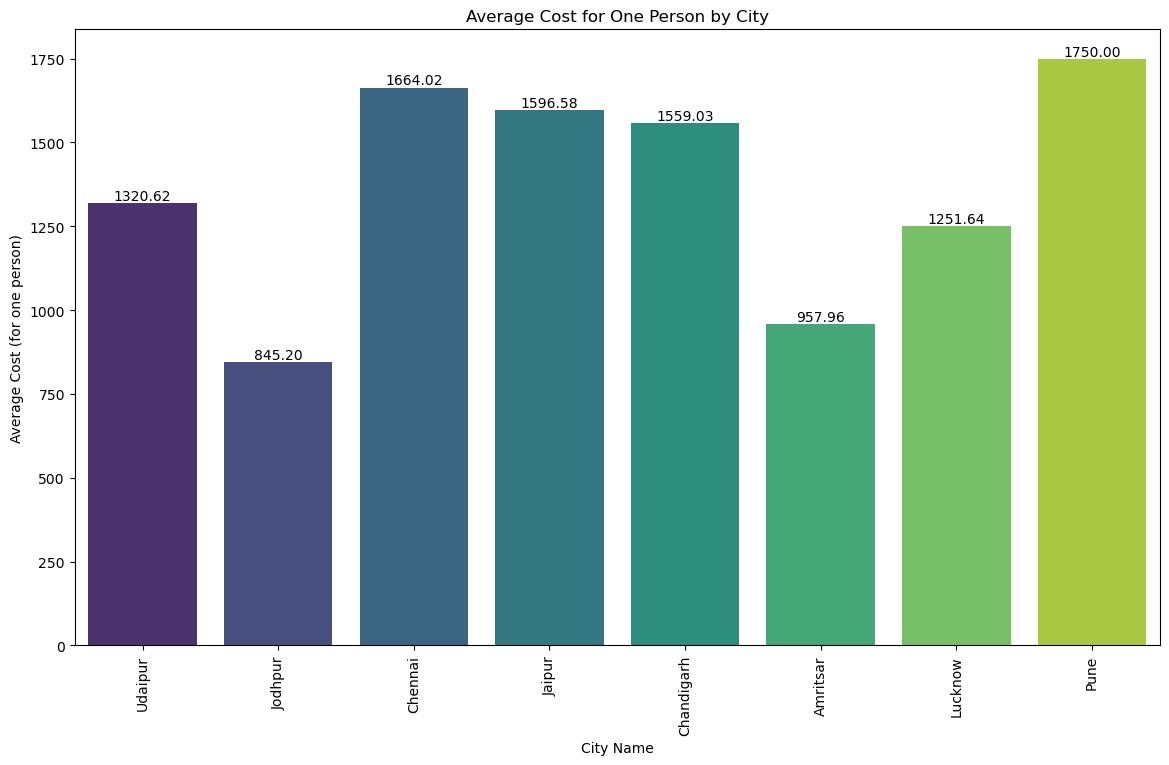

In [40]:
for i in best_locations['city_name'].unique():
    print(i)
    print(data[data['city_name']==i]['Avg_cost(for one person)'].mean())
average_costs = []

# Calculate the average cost for each city in best_locations
for i in best_locations['city_name'].unique():
    city_avg_cost = df[df['city_name'] == i]['Avg_cost(for one person)'].mean()
    average_costs.append((i, city_avg_cost))

# Convert the results to a DataFrame
avg_cost_df = pd.DataFrame(average_costs, columns=['City Name', 'Average Cost'])

# Plotting the results
plt.figure(figsize=(14, 8))
bars = sns.barplot(x='City Name', y='Average Cost', data=avg_cost_df, palette='viridis')

# Add title and labels
plt.xlabel('City Name')
plt.ylabel('Average Cost (for one person)')
plt.title('Average Cost for One Person by City')
plt.xticks(rotation=90)  # Rotate city names for better readability

# Add value labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.show()

In [31]:
# food_df[food_df['city_name']=='Allahabad']['Food_Type'].value_counts().head()


In [48]:
top_cities = best_locations[['city_name']]#.head(10)
top_food_per_city = {}

avg_cost={}

for city in top_cities['city_name'].unique():
    top_foods = city_food[city_food['city_name'].str.strip() == city.strip()]['Food_Type'].value_counts().head(10).index.tolist()
    top_food_per_city[city] = top_foods
    food_cost=data[data['city_name'].str.strip() == city.strip()]['Avg_cost(for one person)'].mean().round()
    avg_cost[city]=food_cost
# Add the top food types as a new column in best_locations
best_locations['Top_Food_Types'] = best_locations['city_name'].map(top_food_per_city)
best_locations['Avg_cost_per_Head'] = best_locations['city_name'].map(avg_cost)


# Display the updated best_locations DataFrame
pd.set_option('display.max_colwidth', None)  # Ensures all text in columns is displayed
pd.set_option('display.expand_frame_repr', False)  # Prevents line wrapping for wide DataFrames
pd.set_option('display.max_columns', None)
final_data=best_locations[["city_name", "Location", "Top_Food_Types",'Avg_cost_per_Head']].head(100)#, "Rating", "Distance(km)", "Avg_cost(for one person)", "Final_Score","Final_Score"

In [52]:
final_data.reset_index().drop('index',axis=1)

,city_name,Location,Top_Food_Types,Avg_cost_per_Head
0,Udaipur,Chandpol,"[North Indian, Beverages, Desserts, Chinese, Fast Food, Continental, Pizza, Italian, Sandwich, Coffee]",1321.0
1,Jodhpur,Cantt Area,"[North Indian, Fast Food, Chinese, Beverages, Desserts, Pizza, Italian, South Indian, Shake, Sandwich]",845.0
2,Chennai,MRC Nagar,"[Desserts, North Indian, Beverages, Continental, Chinese, Italian, Asian, South Indian, Pizza, Fast Food]",1664.0
3,Jaipur,Agra Road,"[North Indian, Chinese, Beverages, Desserts, Continental, Italian, Fast Food, Pizza, Asian, Mexican]",1597.0
4,Chennai,Guindy,"[Desserts, North Indian, Beverages, Continental, Chinese, Italian, Asian, South Indian, Pizza, Fast Food]",1664.0
5,Chandigarh,Chandigarh,"[North Indian, Beverages, Desserts, Chinese, Continental, Italian, Pizza, Fast Food, Cafe, Asian]",1559.0
6,Amritsar,Taj Swarna,"[North Indian, Chinese, Fast Food, Beverages, Continental, Desserts, Pizza, Italian, Burger, Sandwich]",958.0
7,Udaipur,The LaLiT Laxmi Vilas Palace,"[North Indian, Beverages, Desserts, Chinese, Fast Food, Continental, Pizza, Italian, Sandwich, Coffee]",1321.0
8,Lucknow,Husain Ganj,"[North Indian, Desserts, Beverages, Chinese, Fast Food, Continental, Italian, Mughlai, Pizza, Biryani]",1252.0
9,Pune,Nagar Road,"[North Indian, Desserts, Continental, Beverages, Chinese, Asian, Italian, Biryani, Pizza, Fast Food]",1750.0


In [43]:
final_data.to_csv(r'C:\Users\vempa\OneDrive\Desktop\web scraping\Best_places to establish New Restaurent.csv')